# TP3 :  Discrétisation de l'équation de la chaleur

In [1]:
import numpy as np
import math

import scipy.sparse as sparse
import scipy.sparse.linalg

from scipy.integrate import quad

import matplotlib.pyplot as plt

### Equation de la chaleur :
On se place dans le domaine temporel $]0,T[$ ($T>0$) et spatial $]0,1[$.
On souhaite discrétiser l'équation de la chaleur avec des conditions aux limites de Dirichlet homogènes :
$$\dfrac{\partial u}{\partial t} - \dfrac{\partial^2 u}{\partial x^2} = f \text{ dans } ]0,T[ \times ]0,1[,$$
$$u(t,0) = u(t,1) = 0 \text{ pour } t \in ]0,T[,$$
$$u(0,x) = u_0(x) \text{ pour } x \in ]0,1[,$$
où $f$ est une fonction de $]0,T[ \times ]0,1[$ donnée et $u_0$ est une fonction donnée de $]0,1[$.

### Discrétisation du domaine :
On discrétise le domaine spatial $]X_{\text{min}},X_{\text{max}}[$ par $M>0$ sous-intervalles (dans la suite $X_{\text{min}}=0$ et $X_{\text{max}}=1$). 
Les points correspondant à cette discrétisation sont les $x_i = X_{\text{min}} + i h_x$ avec $h_x = \frac{X_{\text{max}} - X_{\text{min}}}{M}$ ($0 \leq i \leq M$). 
On discrétise le domaine temporel $]0,T[$ par $N>0$ sous-intervalles.
Les points correspondants sont les $t_n = n h_t$ avec $h_t = \frac{T}{N}$.
On pourra calculer ces points avec les commandes suivantes :

In [2]:
M=2
print(np.linspace(0,1,M+1))

T=2
N=2
print(np.linspace(0,T,N+1))

[0.  0.5 1. ]
[0. 1. 2.]


### Solution exacte :

Pour étudier la convergence de nos schémas numériques, on propose la solution suivante :
$$u(t,x) = \cos(t)\sin(\pi x) . $$

La fonction second membre correspondante est
$$f(t,x) = (-\pi^2 \cos(t)-\sin(t)) \sin(\pi x) ,$$
et la donnée initiale est
$$ u_0(x) = \sin(\pi x) . $$

In [4]:
#M_PI = math.pi

# sol exacte
def u_ex(t,x):
    return math.cos(t)*math.sin(M_PI * x)

# fonction second membre
def f(t,x):
    return (- M_PI**2 * math.cos(t) - math.sin(t)) * math.sin(M_PI * x)

# donnée initiale
def u_0(x):
    return math.sin(M_PI*x)


### Schéma explicite centré :
On se propose d'approcher les dérivées partielles par
$$ \dfrac{\partial u}{\partial t} (t_n,x_j) = \dfrac{u(t_{n+1},x_j) - u(t_n,x_j)}{h_t} + O(h_t),$$
$$ \dfrac{\partial^2 u}{\partial x^2} (t_n,x_j) = \dfrac{u(t_n,x_{j+1}) - 2 u(t_n,x_j) + u(t_n,x_{j-1})}{h_x^2} + O(h_x^2).$$

Ceci nous donne le schéma aux différences finies suivant :
$$ \left\{ \begin{array}{l}
 u_{j}^{n+1} = u_j^n + \dfrac{h_t}{h_x^2} (u_{j-1}^n - 2 u_j^n + u_{j+1}^n) + h_t f(t_n,x_j) 
 \text{  pour  } 1 \leq j \leq M-1 \text{  et  } 0 \leq n \leq N-1 ,
 \\
 u_0^n = u_M^n = 0 \text{  pour  } 0 \leq n \leq N ,
 \\
 u_j^0 = u_0(x_j) \text{  pour  } 0 \leq j \leq M .
 \end{array} \right.$$

In [4]:
# schema explicite centre
def schema_exp_cen(N,M):
    return u

1.0
0
0
0.0
1.0
0


### Ecriture algébrique :
On exprime $u_h \in V_{h0}$ dans la base $(\Phi_j)_{1 \leq j \leq M-1}$.
On a donc 
$$u_h (x) = \sum_{j=1}^{M-1} u_j \Phi_j (x) \quad \forall x \in [0,1]$$
où $u_j = u(x_j)$. On peut alors trouver les $u_j$ en résolvant le système linéaire
$$A U = F$$
où 
$$U = \begin{pmatrix} u_1 \\ u_2 \\ \vdots \\ u_{M-1} \end{pmatrix}, \qquad
F = \begin{pmatrix} \int_0^1 f(x) \Phi_1(x) dx \\ \int_0^1 f(x) \Phi_2(x) dx \\ \vdots \\ \int_0^1 f(x) \Phi_{M-1}(x) dx \end{pmatrix}
$$
et
$$
A = 
\begin{pmatrix} 
\int_0^1 \Phi_1'(x) \Phi_1'(x) dx & \cdots & \int_0^1 \Phi_1'(x) \Phi_{M-1}'(x) dx 
\\ 
\vdots &  & \vdots
\\
\int_0^1 \Phi_{M-1}'(x) \Phi_1'(x) dx & \cdots & \int_0^1 \Phi_{M-1}'(x) \Phi_{M-1}'(x) dx
\end{pmatrix}
= 
\dfrac1{h}
\begin{pmatrix}
2 & -1 & & (0)
\\
-1 & \ddots & \ddots
\\
   & \ddots & \ddots & -1
\\
(0)&& -1 & 2
\end{pmatrix}$$

In [5]:
# coder une fonction renvoyant la matrice A en fonction de M
def mat_A(M):
    h = 1/M
    
    row = list()
    col = list()
    data = list()
    
    # A_0,0
    row.append((0))
    col.append((0))
    data.append(2)
    
    # A_0,1
    row.append((0))
    col.append((1))
    data.append(-1)
    
    #loop
    for i in range(1,M-2):
    
        # A_i,i = qque chose (exemple)
        row.append((i))
        col.append((i))
        data.append( 2 )  
    
        # A_i,i-1 = autre chose (exemple)
        row.append((i))
        col.append((i-1))
        data.append( -1 )
    
        # A_i,i+1 = encore autre chose
        row.append((i))
        col.append((i+1))
        data.append( -1 )

    # A_{M-2},{M-3}
    row.append((M-2))
    col.append((M-3))
    data.append(-1)
    
    # A_{M-2},{M-2}
    row.append((M-2))
    col.append((M-2))
    data.append(2)
    
    row = np.array(row)
    col = np.array(col)
    data = np.array(data)      
    A = (sparse.coo_matrix((data, (row, col)), shape=(M-1, M-1))).tocsr()
    return A/h



On se propose de coder une première approximation de la fonction second membre obtenue par
$$F_j = h f(x_{j+1}) \qquad 0 \leq j \leq M-1$$

On pourra dans un second temps (une fois que tout le TP est fini) coder la fonction exacte donnant
$$F_j = \int_0^1 f(x) \Phi_{j+1}(x) dx \qquad 0 \leq j \leq M-1$$

In [6]:
# premiere approximation :
def RHS_DF(M,f):
    F = np.zeros(M-1)
    h = 1./M
    for i in range(0,M-1):
        xi = (i+1)*h
        F[i] = h*f(xi)
    return F

def unite(x):
    return x
# pour la deuxieme fonction (a faire une fois que tout le TP est fini)
# on pourra utiliser la methode d'integration suivante qui calcule l'integrale de unite(x) entre 0 et 1 :
integrale = quad(unite,0,1)[0]
print(integrale)

# valeur exacte de F
def RHS_F(M,f):
    F = np.zeros(M-1)
    h = 1./M
    for i in range(0,M-1):
        xi = (i+1)*h
        def fPhi(x):
            return f(x) * Phi(M,i+1,x)
        F[i] = quad(fPhi, xi-h, xi+h)[0]
    return F




0.5


Coder une fonction retournant la solution éléments finis aux points $(x_j)_{0 \leq j \leq M}$. On pourra tester successivement les deux fonctions second membre.

In [7]:
# fonction calculant la solution elements finis
def EF_DH(M,f):
    A = mat_A(M)
    F = RHS_DF(M,f)
    U = np.zeros(M+1)
    U[1:M] = sparse.linalg.spsolve(A, F)
    return U


Représenter $u_h$ graphiquement et la comparer avec la solution exacte.

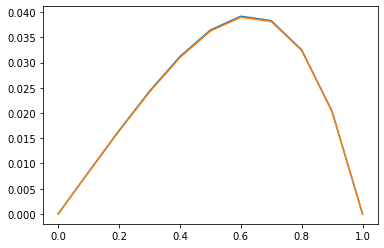

In [8]:
# fonction representant u_h graphiquement
# et la comparant avec la solution exacte
def graph_sol(M,f,u_ex):
    X = np.linspace(0,1,M+1)
    sol_ex = np.zeros(M+1)
    for i in range(0,M+1):
        sol_ex[i] = u_ex(X[i])
    
    sol_EF = EF_DH(M,f)
    
    plt.plot(X,sol_ex)
    plt.plot(X,sol_EF)
    plt.show()

graph_sol(10,f,u_ex)



### Calcul des normes
On définit la semi-norme $H^1$ de $v_h \in V_{h0}$ comme
$$\| v_h' \|_{L^2} = \sqrt{\int_0^1 (v_h'(x))^2 dx} = \sqrt{\sum_{j=1}^M h\left(\dfrac{v_h(x_{j}) - v_h(x_{j-1})}{h} \right)^2}$$
Coder une fonction calculant cette quantité à partir des coefficients $V$ de $v_h$.

In [9]:
def norme_H1(M,V):
    h = 1./M
    somme = 0
    for j in range(1,M+1):
        somme += (V[j]-V[j-1])**2 / h
    return math.sqrt(somme)



De la même façon, coder une fonction qui renvoie la norme $L^2$ donnée par
$$\| v_h \|_{L^2} = \sqrt{\int_0^1 (v_h(x))^2 dx} = \sqrt{\dfrac{h}3 \sum_{j=1}^M (v_h(x_{j-1}))^2 + v_h(x_{j-1}) v_h(x_{j}) + (v_h(x_{j}))^2 }$$

In [10]:
def norme_L2(M,V):
    h = 1./M
    somme = 0
    for j in range(1,M+1):
        somme += (V[j-1]**2 + V[j-1]*V[j] + V[j]**2)
    return math.sqrt(h * somme / 3)


### Etude de convergence
Pour différentes valeurs de $M$, calculer l'erreur commise par le schéma en semi-norme $H^1$, c'est-à-dire $\| u_h' - I_h' \|_{L^2}$ où $u_h$ est la solution obtenue par la méthode des éléments finis et $I_h \in V_{h0}$ est l'interpolateur de Lagrange défini par $I_h(x_j) = u(x_j)$ ($1 \leq j \leq M-1$). Tracer l'erreur en fonction de $M$ en échelle log-log. Tracer également l'erreur en norme $L^2$. Commenter l'ordre de convergence obtenu.

[]

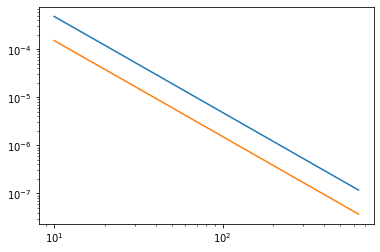

In [11]:
liste_M = [10,20,40,80,160,320,640]
liste_err_H1 = []
liste_err_L2 = []

for M in liste_M:
    X = np.linspace(0,1,M+1)
    
    # interpolation de Lagrange
    I = np.zeros(M+1)
    for j in range(1,M):
        I[j] = u_ex(X[j])
        
    # solution elements finis
    U = EF_DH(M,f)
    
    # calcul de l'erreur en semi-norme H^1
    liste_err_H1.append(norme_H1(M,U-I))
    
    # calcul de l'erreur en norme L^2
    liste_err_L2.append(norme_L2(M,U-I))


plt.plot(liste_M, liste_err_H1)
plt.plot(liste_M, liste_err_L2)
plt.loglog()